# **Анализ оттока клиентов**

**Заказчик** - отдел маркетинга «Метанпромбанк»

**Цель исследования** - анализ клиентов регионального банка и выделение сегментов клиентов, которые склонны уходить из банка.

Для достижения цели необходимо решить следующие **задачи**:
1. Загрузить данные и изучить общую информацию о датасете
2. Провести предобработку данных
3. Провести исследовательский анализ данных
4. Проверить гипотезы
5. Выделить высокоотточные сегменты и приоритизировать их
6. Составить общий вывод и дать рекомендации
7. Подготовить презентацию

**Вводные данные**:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.


# Материалы: https://disk.yandex.ru/i/mjop-TPtTmIgng

**СОДЕРЖАНИЕ**
1. [Загрузка данных и изучение общей информации о датасете](#1)
2. [Предобработка данных](#2)
    * [Приведение столбцов в соответствии с хорошим стилем](#21)
    * [Обработка дубликатов в данных](#22)
    * [Обработка пропусков в данных](#23)
    * [Изменение типов данных](#24)
3. [Исследовательский анализ данных](#3)
    * [Построение распределений](#31)
    * [Определение портрета клиента](#32)
    * [Корреляционный анализ](#33)
4. [Проверка гипотез](#4)
    * [Гипотеза №1](#41)
    * [Гипотеза №2](#42)
5. [Выделение высокоотточных сегментов и их приоритезация](#5)
6. [Общий вывод и рекомендации](#6)
7. [Презентация](#7)

## Общая информация о датасете
<a id="1"></a>

In [ ]:
import pandas as pd
import itertools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

try:
    import phik
except:
    !pip install phik -q


import phik
from phik import phik_matrix

In [ ]:
try:
    df = (pd.read_csv('/datasets/bank_scrooge.csv'))
except:
    df = (pd.read_csv('bank_scrooge.csv'))

In [ ]:
display(df.head(10))
print('---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------')
print(df.info())
print('----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------')
display(df.describe())
print('----------------------------------------ПРОПУСКИ-----------------------------------------------------')
print(df.isna().sum())
print('----------------------------------------ДУБЛИКАТЫ----------------------------------------------------')
print(df.duplicated().sum())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None
----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


----------------------------------------ПРОПУСКИ-----------------------------------------------------
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


**Промежуточный вывод 1:**

Данные состоят из 10000 строк и 12 колонок:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

Наименования столбцов необходимо привести в соответствии с хорошим стилем к нижнему регистру. Типы данных в столбцах: 'score', 'age' стоит изменить на целочисленный int, 'credit_card', 'last_activity', 'EST_SALARY' стоит изменить на bool. Явных дубликатов в данных нет, неявные дубликаты проверим в следующем разделе. В данных присутствуют пропуски в age и balance.

## Предобработка данных:
<a id="2"></a>

### Приведение столбцов в соответствии с хорошим стилем:
<a id="21"></a>

**Приведем наименование столбцов в соответствие с хорошим стилем к нижнему и змеиному регистру:**

In [ ]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id'})
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


### Обработка дубликатов в данных:
<a id="22"></a>

**В предыдущем разделе выяснили, что явных дубликатов в данных нет. Проверим данные на неявные дуликаты. Посмотрим количество дубликатов по user_id:**

In [ ]:
df['user_id'].duplicated().sum()

73

**Поближе посмотрим на эти дубликаты:**

In [ ]:
df[df.duplicated('user_id', keep=False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


**Отличия есть. Скорее всего дубликаты возникли при объединении клиентов из разных городов (филиалов банка) в один датасет. Но все же проверим на наличие дубликатов по user_id и city:**

In [ ]:
df[df.duplicated(['user_id', 'city'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


**Посмотрим на уникальные наименования в score:**

In [ ]:
for col in ['score', 'city', 'gender', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
    unique_vals = df[col].sort_values().unique()
    print(f"{col}: {len(unique_vals)} значений → {unique_vals}")

score: 348 значений → [ 642.  646.  648.  649.  650.  651.  652.  653.  654.  655.  656.  657.
  658.  659.  660.  661.  662.  663.  664.  665.  666.  667.  668.  669.
  670.  671.  673.  678.  680.  681.  682.  684.  685.  686.  687.  688.
  689.  690.  691.  692.  693.  694.  695.  696.  697.  698.  699.  700.
  701.  702.  703.  704.  705.  706.  707.  708.  709.  710.  711.  712.
  713.  714.  715.  716.  717.  718.  719.  720.  721.  722.  723.  724.
  725.  726.  727.  728.  729.  730.  731.  732.  733.  734.  735.  736.
  737.  738.  739.  740.  741.  742.  743.  744.  745.  746.  747.  748.
  749.  750.  751.  752.  753.  754.  755.  756.  757.  758.  759.  760.
  761.  762.  763.  764.  765.  766.  767.  768.  769.  770.  771.  772.
  773.  774.  775.  776.  777.  778.  779.  780.  781.  782.  783.  784.
  785.  786.  787.  788.  789.  790.  791.  792.  793.  794.  795.  796.
  797.  798.  799.  800.  801.  802.  803.  804.  805.  806.  807.  808.
  809.  810.  811.  812.  813

**Неявных дубликатов нет.**

### Обработка пропусков в данных:
<a id="23"></a>

In [ ]:
tmp = df.copy()
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков, %': (tmp.isnull().mean()*100).round(2)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,"Доля пропусков, %"
age,26,0.260000
balance,2295,22.950000


**Пропуски в balance невозможно заменить средним или высчитать по другим признакам, т.к. это индивидуальные значения. Т.к. Пропусков в этом столбце очень много, удалять их нельзя. Оставим их без изменений:**

**Посмотрим на пропуски в столбце age:**

In [ ]:
df.query('age.isna()')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


**В основном это клиенты, которые остались, за исключением одного экземпляра. Восстановить пропуск не представляется возможным. Т.к. процент пропуска мал - 0,26% от всего датасета - удалим эти пропуски.**

In [ ]:
df = df.dropna(subset=['age'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


### Изменение типов данных:
<a id="24"></a>

**Изменим тип данных в credit_card, last_activity, churn на bool, в score, age на int.**

In [ ]:
pd.set_option('mode.chained_assignment', None)

In [ ]:
cols = ['credit_card', 'last_activity', 'churn']
df[cols] = df[cols].astype('bool')

In [ ]:
df = df.astype({'score': int, 'age': int}, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   bool   
 9   last_activity  9974 non-null   bool   
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 808.4+ KB


**Промежуточный вывод 2:**

В результате подготовки данных:
- наименования столбцов были приведены в соответствии с хорошим стилем к нижнему и змеиному регистру
- неявных дубликатов не выявлено
- удалены пропуски в age - 0,26% от всего датасета
- не удалены пропуски в столбцах balance - заполнение данных невозможно в виду индивидуальности значений
- преобразованы типы данных в соответствии с содержимым в столбцах credit_card, last_activity, churn на bool, в score, age на int.

Количество строк сократилось до 9974. Пропуски остались в столбце balance (22.95% от всего датасета).

## Исследовательский анализ данных:
<a id="3"></a>

### Построение распределений:
<a id="31"></a>

**Перед построением распределений, еще раз посмотрим на средние статистические показатели:**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,9974.0,171755.218669,3.369553e+04,94561.0,142760.000,172643.000,201163.7500,2.291450e+05
score,9974.0,848.682575,6.539972e+01,642.0,802.000,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.000,40.000,51.0000,8.600000e+01
equity,9974.0,2.630840,1.979965e+00,0.0,0.000,3.000,4.0000,9.000000e+00
balance,7695.0,827245.587515,1.980327e+06,0.0,295698.715,524295.330,980051.2150,1.191136e+08
products,9974.0,1.871466,7.927286e-01,0.0,1.000,2.000,2.0000,5.000000e+00
est_salary,9974.0,147786.809731,1.392855e+05,2546.3,75251.660,119626.795,174499.8125,1.395064e+06


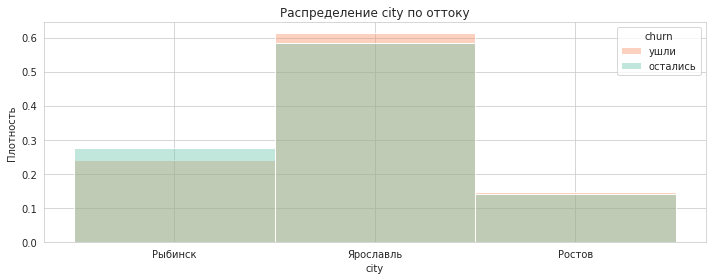

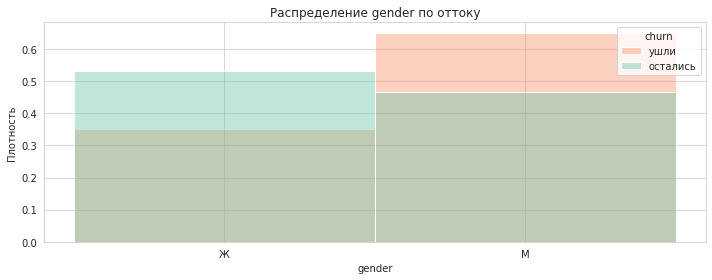

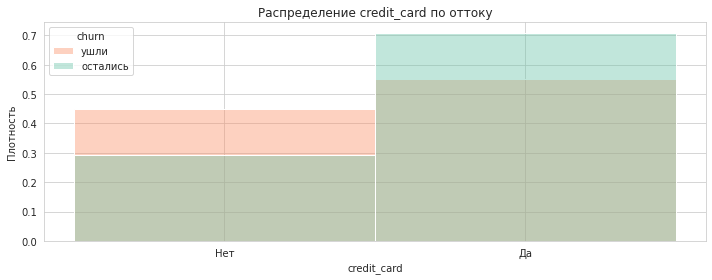

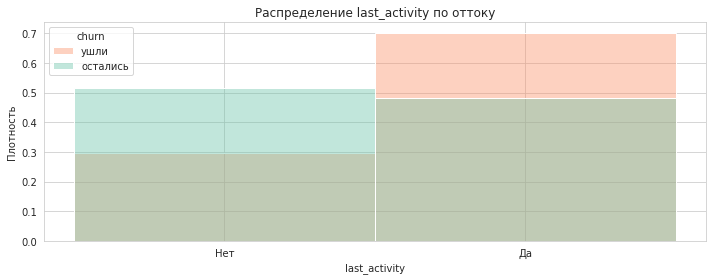

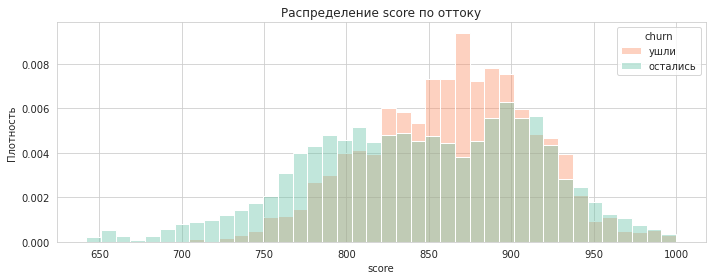

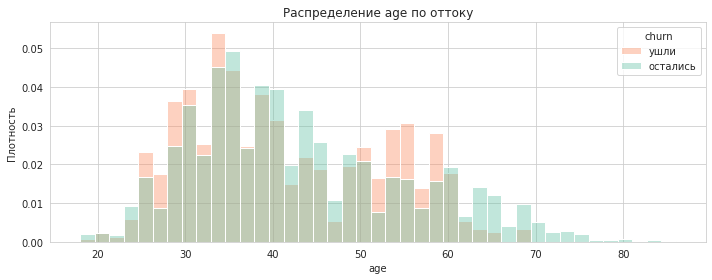

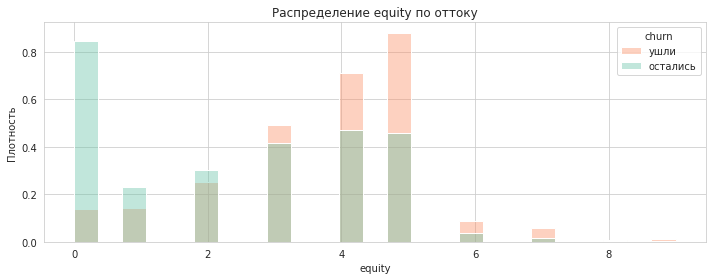

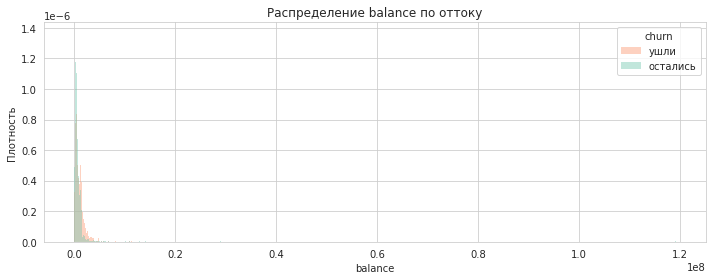

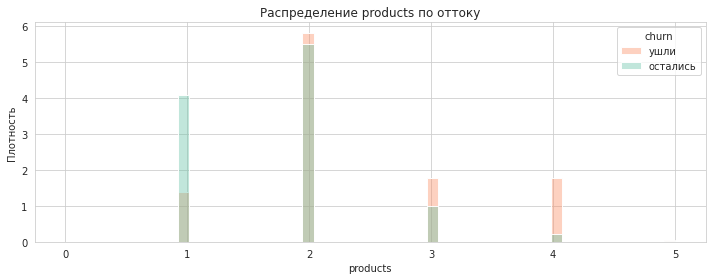

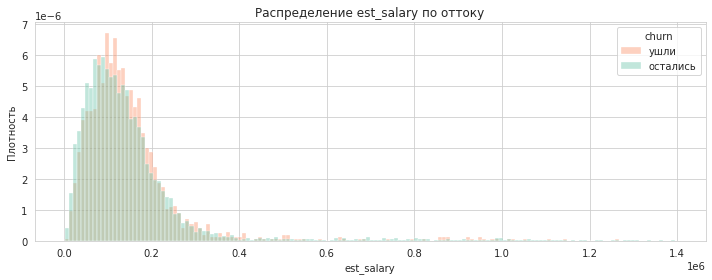

In [ ]:
# Список категориальных признаков
cat_cols = ['city', 'gender']

# Список булевых признаков, кроме churn
bool_cols = ['credit_card', 'last_activity']

# Список числовых признаков
num_cols = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

# Настройка стиля
sns.set_style('whitegrid')

#Гистограммы для нечисловых признаков (столбчатые диаграммы)
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(
        data=df,
        x=col,
        hue='churn',
        stat='density',
        common_norm=False,
        alpha=0.4,
        palette='Set2'
    )
    plt.title(f'Распределение {col} по оттоку')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend(title='churn', labels=['ушли','остались'])
    plt.tight_layout()
    plt.show()

#Гистограммы для булевых признаков (столбчатые диаграммы)
for col in bool_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(
        data=df.assign(**{col: df[col].astype(int)}),
        x=col,
        hue='churn',
        stat='density',
        discrete=True,
        common_norm=False,
        alpha=0.4,
        palette='Set2'
    )
    plt.title(f'Распределение {col} по оттоку')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend(title='churn', labels=['ушли','остались'])
    plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
    plt.tight_layout()
    plt.show()

# Распределения для числовых признаков
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(
        data=df,
        x=col,
        hue='churn',
        stat='density',
        common_norm=False,
        alpha=0.4,
        palette='Set2'
    )
    plt.title(f'Распределение {col} по оттоку')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend(title='churn', labels=['ушли','остались'])
    plt.tight_layout()
    plt.show()

**Посмотрим на распределение по est_salary и balance поближе:**

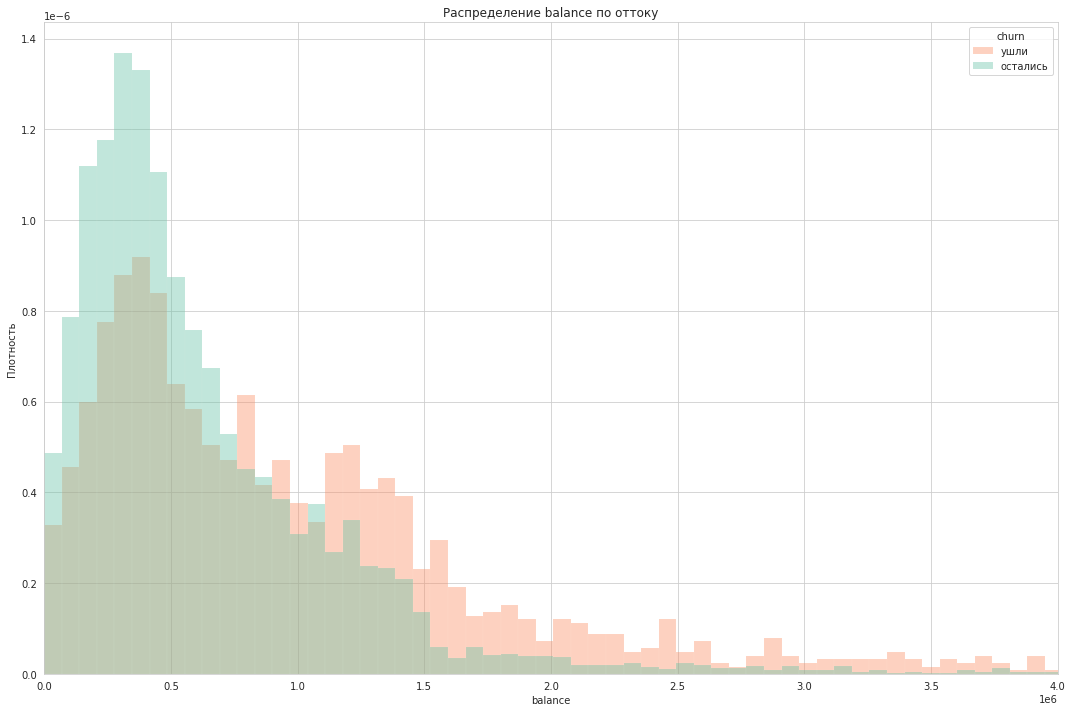

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(
        data=df,
        x='balance',
        hue='churn',
        stat='density',
        common_norm=False,
        alpha=0.4,
        palette='Set2'
    )
plt.xlim(0, 4000000)
plt.title(f'Распределение balance по оттоку')
plt.xlabel('balance')
plt.ylabel('Плотность')
plt.legend(title='churn', labels=['ушли','остались'])
plt.tight_layout()
plt.show()

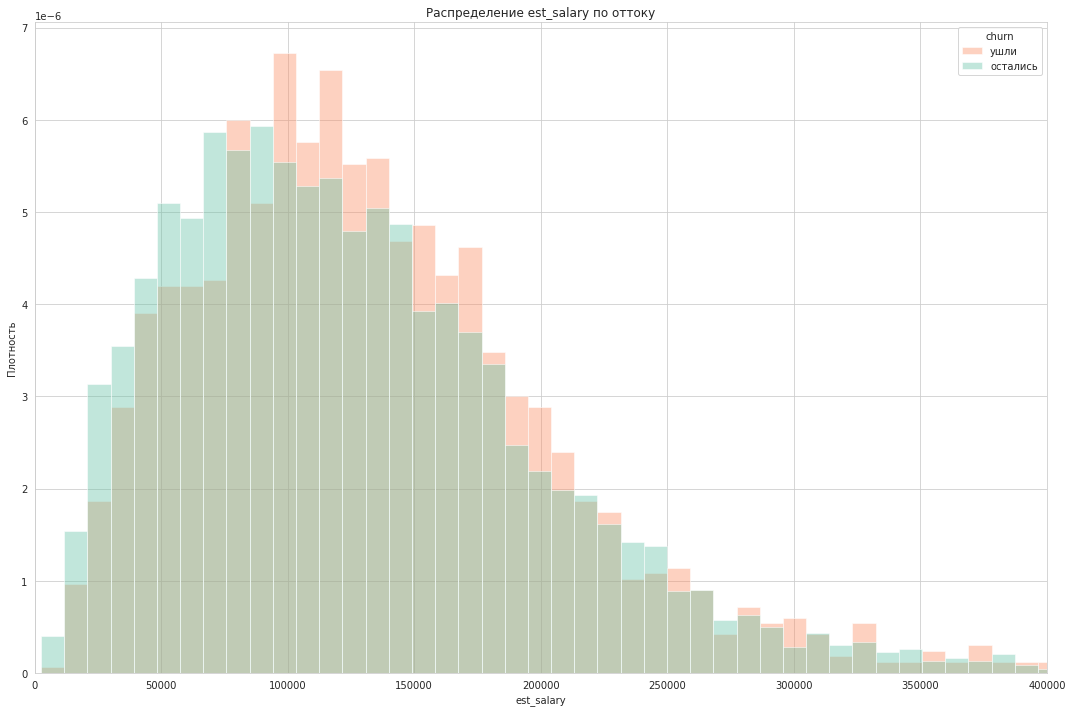

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(
        data=df,
        x='est_salary',
        hue='churn',
        stat='density',
        common_norm=False,
        alpha=0.4,
        palette='Set2'
    )
plt.xlim(0, 400000)
plt.title(f'Распределение est_salary по оттоку')
plt.xlabel('est_salary')
plt.ylabel('Плотность')
plt.legend(title='churn', labels=['ушли','остались'])
plt.tight_layout()
plt.show()

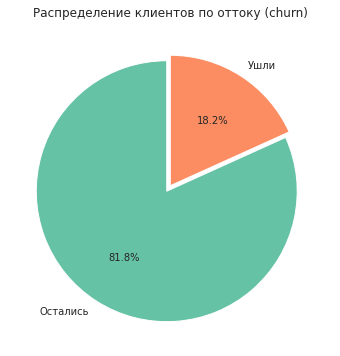

In [ ]:
# Группируем данные по churn и считаем количество клиентов
churn_counts = df['churn'].value_counts()
# Чтобы цвет был одинаковым
set2_colors = sns.color_palette('Set2')
# Строим круговую диаграмму
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    churn_counts,
    labels=['Остались', 'Ушли'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[set2_colors[0], set2_colors[1]],
    explode=(0.05, 0)
)
ax.set_title('Распределение клиентов по оттоку (churn)')
plt.show()

**Из распределений видно, что:**
- по городам: Больше всего клиентов в Ярославле, меньше всего клиентов в Ростове. В Рыбинске клиенты чаще остаются, чем уходят. В Ярославле и Ростове чаще уходят, чем остаются. Чаще всего клиенты уходят в Ярославле.

- по полу: Больше клиентов мужчин. И, соответсвенно, чаще уходят мужчины.

- по наличию кредитной карты: Больше клиентов с кредитной картой банка. Чаще всего уходят клиенты, у которых нет кредитной карты.

- по активности: Больше активных клиентов. Чаще уходят активные клиенты.

- по баллам кредитного скоринга: Большинство клиентов имеют 780-930 баллов. Пик оттока - 820-910 баллов.

- по возрасту: Возраст клиентов от 18 до 86 лет. Чаще всего уходят клиенты от 25 до 35 лет и от 50 до 60 лет

- по количеству баллов собственности: Больше клиентов с 5 баллами. Уходят клиенты с количеством баллов от 3 и выше.

- по балансу на счете: В данных присутствует тяжелый хвост с максимумом в 119 млн. Большинство клиентов имеют баланс до 1 млн. Чаще всего уходят клиенты с большим балансом, начиная с 1млн.  

- по количеству продуктов, которыми пользуется клиент: Больше всего клиентов с 2-мя продуктами. Клиенты уходят от двух продуктов и выше. Чаще всего уходят клиенты с 4-мя продуктами.

- по оценочному доходу: Здесь также есть длинный хвост до 1,395млн. Большинство клиентов имеют оценочный доход в размере от 80тыс. до 110тыс. Чаще всего уходят клиенты с оценочным доходом от 100тыс.

**Общий отток клиентов составляет 18,2% от общего количества клиентов банка.**

### Определение портрета клиента:
<a id="32"></a>

**Составим краткую сводку по ушедшим и оставшимся клиентам:**

In [ ]:
def summarize_by_churn(df, churn_col="churn"):
    #Формируем компактную таблицу метрик отдельно для `churn = 0` и `churn = 1`.
    if churn_col not in df.columns:
        raise KeyError(f"В DataFrame нет колонки '{churn_col}'.")

    summary = {}
    for col in df.columns:
        if col == churn_col:
            continue

        grouped = df.groupby(churn_col)[col]

        if pd.api.types.is_numeric_dtype(df[col]):
            summary[f"{col}_mean"] = grouped.mean()
            summary[f"{col}_median"] = grouped.median()
        else:
            summary[f"{col}_mode"] = grouped.apply(
                lambda s: s.mode().iat[0] if not s.mode().empty else np.nan
            )

    out = pd.DataFrame(summary).T
    out.columns = [f"churn_{int(c)}" for c in out.columns]
    out.index.name = "metric"

    # округляем все числовые значения до целого
    out = out.applymap(lambda x: int(round(x)) if isinstance(x, (int, float, np.floating)) and not pd.isna(x) else x)
    return out

summarize_by_churn(df)

,churn_0,churn_1
metric,,
user_id_mean,171928,170980
user_id_median,173142,170532
score_mean,845,863
score_median,848,866
city_mode,Ярославль,Ярославль
gender_mode,Ж,М
age_mean,43,41
age_median,40,39
equity_mean,2,4


**Основываясь на проведенном анализе составим портреты клиентов, которые уходят и остаются.**

**Портрет клиента, который остался:**
- женщина
- проживает в Ярославле
- в возрасте 40 лет
- балл кредитного скоринга около 850
- пользуется 2мя продуктами в банке
- количество баллов собственности - 2
- имеет кредитную карту
- неактивный
- медиана баланса - 475тыс.
- медиана оцененного дохода - 118тыс.

**Портрет клиента, который ушёл:**
- мужчина
- проживает в Ярославле
- в возрасте 25-35 или 50-60 лет
- балл кредитного скоринга в диапазоне от 820 до 910
- пользуется от 2х продуктов банка
- количество баллов собственности от 3х
- не имеет кредитную карту
- активный
- баланс на счете от 1млн
- оцененный доход от 100 тыс.

**Похоже из банка уходят в основном VIP-клиенты. Таким клиентам важны "плюшки", комплексное обслуживание, низкие ставки по кредитам, высокие по вкладам, привилегии по картам и др.**

### Корреляционный анализ:
<a id="33"></a>

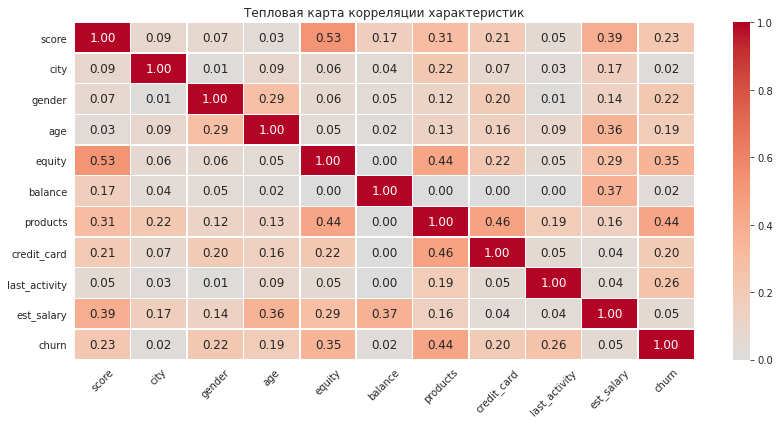

In [ ]:
# подготовка датафрейма
df_phik = df.drop(columns=['user_id'])

# указание столбцов с интервальными переменными
interval_cols = ['score', 'age', 'balance', 'est_salary']

# формирование матрицы корреляции
phik_corr = df_phik.phik_matrix(interval_cols=interval_cols)

# задание размера графика
plt.figure(figsize=(12, 6))

# скрытие верхнего трегольника
#mask = np.triu(np.ones_like(phik_corr, dtype=bool))

# вывод графика
ax = sns.heatmap(
    data=phik_corr,
    vmax=1,
    annot=True,
    #mask=mask,
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    fmt=".2f",
    annot_kws={'size':12}
)
plt.title('Тепловая карта корреляции характеристик')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

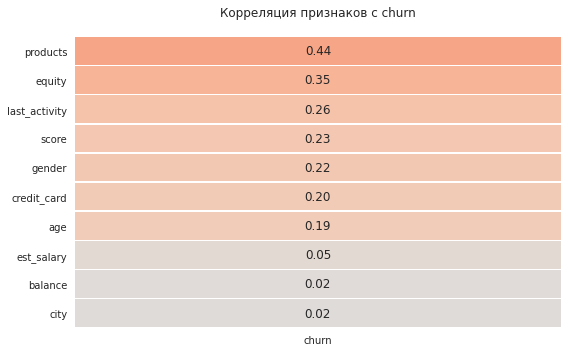

In [ ]:
#Выбираем только строку/столбец для 'churn'
churn_corr = phik_corr[['churn']].sort_values(by='churn', ascending=False)
churn_corr = churn_corr.drop('churn')  # Удаляем корреляцию с самим собой
# Визуализация
plt.figure(figsize=(8, len(churn_corr)*0.5))
sns.heatmap(
    data=churn_corr,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    fmt=".2f",
    annot_kws={'size': 12},
    cbar=False
)
plt.title('Корреляция признаков с churn', pad=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Отток клиентов умеренно связан с количеством используемых банковских продуктов и наличием собственности.**

**Кредитный скоринг клиента заметно связан с наличием собственности и умеренно связан с оценочным доходом клиента. Оценочный доход клиента также еще умеренно связан с возрастом и балансом клиента.**

**Наличие собственности, как уже говорилось, заметно связан с кредитным скорингом и умеренно связан количеством используемых продуктов. Количество используемых продуктов также еще умеренно связано с наличием кредитной карты.**

**Промежуточный вывод 3:**

**Из распределений видно, что:**
- по городам: Больше всего клиентов в Ярославле, меньше всего клиентов в Ростове. В Рыбинске клиенты чаще остаются, чем уходят. В Ярославле и Ростове чаще уходят, чем остаются. Чаще всего клиенты уходят в Ярославле.

- по полу: Больше клиентов мужчин. И, соответсвенно, чаще уходят мужчины.

- по наличию кредитной карты: Больше клиентов с кредитной картой банка. Чаще всего уходят клиенты, у которых нет кредитной карты.

- по активности: Больше активных клиентов. Чаще уходят активные клиенты.

- по баллам кредитного скоринга: Большинство клиентов имеют 780-930 баллов. Пик оттока - 820-910 баллов.

- по возрасту: Возраст клиентов от 18 до 86 лет. Чаще всего уходят клиенты от 25 до 35 лет и от 50 до 60 лет

- по количеству баллов собственности: Больше клиентов с 5 баллами. Уходят клиенты с количеством баллов от 3 и выше.

- по балансу на счете: В данных присутствует тяжелый хвост с максимумом в 119 млн. Большинство клиентов имеют баланс до 1 млн. Чаще всего уходят клиенты с большим балансом, начиная с 1млн.  

- по количеству продуктов, которыми пользуется клиент: Больше всего клиентов с 2-мя продуктами. Клиенты уходят от двух продуктов и выше. Чаще всего уходят клиенты с 4-мя продуктами.

- по оценочному доходу: Здесь также есть длинный хвост до 1,395млн. Большинство клиентов имеют оценочный доход в размере от 80тыс. до 110тыс. Чаще всего уходят клиенты с оценочным доходом от 100тыс.

**Общий отток клиентов составляет 18,2% от общего количества клиентов банка.**


**Портрет клиента, который остался:**
- женщина
- проживает в Ярославле
- в возрасте 40 лет
- балл кредитного скоринга около 850
- пользуется 2мя продуктами в банке
- количество баллов собственности - 2
- имеет кредитную карту
- неактивный
- медиана баланса - 475тыс.
- медиана оцененного дохода - 118тыс.

**Портрет клиента, который ушёл:**
- мужчина
- проживает в Ярославле
- в возрасте 25-35 или 50-60 лет
- балл кредитного скоринга в диапазоне от 820 до 910
- пользуется от 2х продуктов банка
- количество баллов собственности от 3х
- не имеет кредитную карту
- активный
- баланс на счете от 1млн
- оцененный доход от 100 тыс.

**Похоже из банка уходят в основном VIP-клиенты. Таким клиентам важны "плюшки", комплексное обслуживание, низкие ставки по кредитам, высокие по вкладам, привилегии по картам и др.**

**Отток клиентов умеренно связан с количеством используемых банковских продуктов и наличием собственности.**

**Кредитный скоринг клиента заметно связан с наличием собственности и умеренно связан с оценочным доходом клиента. Оценочный доход клиента также еще умеренно связан с возрастом и балансом клиента.**

**Наличие собственности, как уже говорилось, заметно связан с кредитным скорингом и умеренно связан количеством используемых продуктов. Количество используемых продуктов также еще умеренно связано с наличием кредитной карты.**

## Проверка гипотез:
<a id="4"></a>

Правила формулирования нулевой и альтернативной гипотез двухстороннего теста:
- Нулевая гипотеза (H0) - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.
- Альтернативная гипотеза (H1) - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.

Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:
- Нормальное распределение данных: t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.
- Равномерное распределение данных в каждой группе: t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.
- Независимость выборок: t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.
- Достаточно большой размер выборки: для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.
- Отсутствие выбросов: t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.
- Однородность дисперсий: t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.


Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование


### Гипотеза №1:
<a id="41"></a>

**Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.**

**Н0 - доходы клиентов, которые ушли и клиентов, которые остались, одинаковы.**

**Н1 - доходы клиентов, которые ушли и клиентов, которые остались, разные.**

**В величине дохода есть выбросы - проверим гипотезу с помощью двустороннего теста «U-критерия Манна-Уитни» для независимых выборок.**

In [ ]:
# датафрейм ушедших клиентов
df_1 = df.query('churn == True')

# датафрейм оставшихся клиентов
df_0 = df.query('churn == False')

# посмотрим на средние значения по доходу
print('Средний оценочный доход оставшихся клиентов:', round(df_0['est_salary'].mean(), 2))
print('Средний оценочный доход ушедших клиентов:', round(df_1['est_salary'].mean(), 2))
print()

alpha = 0.05

# выполняем тест Манна-Уитни и получаем объект результата
result = stats.mannwhitneyu(
    df_1['est_salary'],
    df_0['est_salary'],
    alternative='two-sided'
)

# извлекаем p-value из объекта результата
p_value = result.pvalue

print(f"Результат теста: p-value = {p_value:.4f}")

if p_value < alpha:
    print('Отвергаем H₀: средние различаются (различие статистически значимо).')
else:
    print('Нет оснований отвергать H₀: статистически значимых различий не найдено.')

Средний оценочный доход оставшихся клиентов: 147674.64
Средний оценочный доход ушедших клиентов: 148289.7

Результат теста: p-value = 0.0002
Отвергаем H₀: средние различаются (различие статистически значимо).


**Различия дохода между теми клиентами, которые ушли и теми, которые остались являются статистически значимыми.**

### Гипотеза №2:
<a id="42"></a>

**Проверим гипотезу различия возраста между теми клиентами, которые ушли и теми, которые остались.**

**Н0 - возраст клиентов, которые ушли и клиентов, которые остались, одинаковый.**

**Н1 - возраст клиентов, которые ушли и клиентов, которые остались, разный.**

**В величине возраста нет выбросов - проверим гипотезу с помощью критерия теста Стьюдента для независимых выборок.**

In [ ]:
# посмотрим на средние значения по доходу
print('Средний возраст оставшихся клиентов:', round(df_0['age'].mean(), 2))
print('Средний возраст ушедших клиентов:', round(df_1['age'].mean(), 2))
print()

# задание уровня статистической значимости
alpha = 0.05

# выполнение t-теста с двусторонней альтернативной гипотезой
p_value = stats.ttest_ind(
    df_1['age'],
    df_0['age'],
    equal_var=False,
    alternative='two-sided'
)

# извлекаем p-value из объекта результата
p_value = result.pvalue

print(f"Результат теста: p-value = {p_value:.4f}")

if p_value < alpha:
    print('Отвергаем H₀: средние различаются (различие статистически значимо).')
else:
    print('Нет оснований отвергать H₀: статистически значимых различий не найдено.')

Средний возраст оставшихся клиентов: 43.02
Средний возраст ушедших клиентов: 41.45

Результат теста: p-value = 0.0002
Отвергаем H₀: средние различаются (различие статистически значимо).


**Различия возраста между теми клиентами, которые ушли и теми, которые остались являются статистически значимыми.**

**Промежуточный вывод 4:**

Выявлены статистически знаимые различия в:
- в доходе между теми клиентами, которые ушли и теми, которые остались
- в возрасте между теми клиентами, которые ушли и теми, которые остались

## Выделение высокоотточных сегментов и их приоритезация
<a id="5"></a>

Выберем наиболее отточные сегменты с сочетанием 2 признаков из:
- кредитный рейтинг от 830 до 900
- пол мужской
- возраст от 26 до 35 и от 55 до 60
- количество баллов собственности от 4 до 9
- без кредитной карты
- активный клиент
- количество продуктов от 2 до 5
- баланс на счете от 1млн до 4 млн
- оцененный доход от 100тыс до 200 тыс

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
def identify_high_churn_segments(
    df,
    *,
    min_size=500,
    max_size=2000,
    churn_threshold=0.30,
    churn_col="churn",
):
    #Ищем сегменты (ровно 2 признака) с долей оттока ≥ 30 % и колчеством клиентов внутри от 500 до 2000.

    #1. Бинарные флаги
    flags = {
        "score_range":      (df["score"].between(820, 910, inclusive="both")),
        "gender_M":         df["gender"] == "М",
        "age_26_35":        df["age"].between(25, 35, inclusive="both"),
        "age_55_60":        df["age"].between(50, 60, inclusive="both"),
        "equity_4_9":       df["equity"].between(4, 9, inclusive="both"),
        "credit_card_false":df["credit_card"] == False,
        "active":           df["last_activity"] == True,
        "products_2_5":     df["products"].between(2, 5, inclusive="both"),
        "balance_1m_4m":    df["balance"].between(1_000_000, 3_999_999, inclusive="both"),
        "salary_100k_200k": df["est_salary"].between(100_000, 199_999, inclusive="both"),
    }

    work = df.copy()
    for name, mask in flags.items():
        work[name] = mask

    flag_cols = list(flags.keys())

    segments = []
    seg_id = 0

    #2. Сочетания 2 признаков
    for col1, col2 in itertools.combinations(flag_cols, 2):
        mask = work[col1] & work[col2]
        size = int(mask.sum())
        if size < min_size or size > max_size:
            continue

        churn_rate = work.loc[mask, churn_col].mean()
        if pd.isna(churn_rate) or churn_rate < churn_threshold:
            continue

        seg_id += 1
        churn_clients = int(round(size * churn_rate))
        segments.append({
            "segment_id": seg_id,
            "feature1": col1,
            "feature2": col2,
            "total_clients": size,
            "churn_clients": churn_clients,
            "churn_rate": round(churn_rate, 2),
        })

    result = (pd.DataFrame(segments)
              .sort_values("churn_rate", ascending=False)
              .reset_index(drop=True))
    return result

In [ ]:
identify_high_churn_segments(df).head()

,segment_id,feature1,feature2,total_clients,churn_clients,churn_rate
0,19,active,balance_1m_4m,920,484,0.53
1,6,gender_M,balance_1m_4m,902,448,0.50
2,18,credit_card_false,balance_1m_4m,843,376,0.45
3,3,score_range,balance_1m_4m,928,411,0.44
4,21,balance_1m_4m,salary_100k_200k,901,379,0.42


**Топ 3 сегмента по оттоку:**
- активные клиенты с балансом на счете от 1млн до 4 млн
- клиенты-мужчины с балансом на счете от 1млн до 4млн
- клиенты без кредитной карты и балансом на счете от 1млн до 4 млн

Все-таки стоит обратить внимание на клиентов с большими цифрами на счете.

**Промежуточный вывод 5:**

Топ 3 сегмента по оттоку:
- активные клиенты с балансом на счете от 1млн до 4 млн
- клиенты-мужчины с балансом на счете от 1млн до 4млн
- клиенты без кредитной карты и балансом на счете от 1млн до 4 млн


## Общий вывод и рекомендации
<a id="6"></a>

Цель исследования достигнута.

Для достижения поставленной цели решены следующие задачи:
1. Загрузили данные и изучили общую информацию о датасете

Данные состоят из 10000 строк и 12 колонок:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

Наименования столбцов необходимо привести в соответствии с хорошим стилем к нижнему регистру. Типы данных в столбцах: 'score', 'age' стоит изменить на целочисленный int, 'credit_card', 'last_activity', 'EST_SALARY' стоит изменить на bool. Явных дубликатов в данных нет, неявные дубликаты проверим в следующем разделе. В данных присутствуют пропуски в age и balance.

2. Провели предобработку данных

- наименования столбцов были приведены в соответствии с хорошим стилем к нижнему и змеиному регистру
- неявных дубликатов не выявлено
- удалены пропуски в age - 0,26% от всего датасета
- не удалены пропуски в столбцах balance - заполнение данных невозможно в виду индивидуальности значений
- преобразованы типы данных в соответствии с содержимым в столбцах credit_card, last_activity, churn на bool, в score, age на int.
- Количество строк сократилось до 9974. Пропуски остались в столбце balance (22.95% от всего датасета).

3. Провели исследовательский анализ данных

Из распределений видно, что:
- по городам: Больше всего клиентов в Ярославле, меньше всего клиентов в Ростове. В Рыбинске клиенты чаще остаются, чем уходят. В Ярославле и Ростове чаще уходят, чем остаются. Чаще всего клиенты уходят в Ярославле.
- по полу: Больше клиентов мужчин. И, соответсвенно, чаще уходят мужчины.
- по наличию кредитной карты: Больше клиентов с кредитной картой банка. Чаще всего уходят клиенты, у которых нет кредитной карты.
- по активности: Больше активных клиентов. Чаще уходят активные клиенты.
- по баллам кредитного скоринга: Большинство клиентов имеют 780-930 баллов. Пик оттока - 820-910 баллов.
- по возрасту: Возраст клиентов от 18 до 86 лет. Чаще всего уходят клиенты от 25 до 35 лет и от 50 до 60 лет
- по количеству баллов собственности: Больше клиентов с 5 баллами. Уходят клиенты с количеством баллов от 3 и выше.
- по балансу на счете: В данных присутствует тяжелый хвост с максимумом в 119 млн. Большинство клиентов имеют баланс до 1 млн. Чаще всего уходят клиенты с большим балансом, начиная с 1млн.
- по количеству продуктов, которыми пользуется клиент: Больше всего клиентов с 2-мя продуктами. Клиенты уходят от двух продуктов и выше. Чаще всего уходят клиенты с 4-мя продуктами.
- по оценочному доходу: Здесь также есть длинный хвост до 1,395млн. Большинство клиентов имеют оценочный доход в размере от 80тыс. до 110тыс. Чаще всего уходят клиенты с оценочным доходом от 100тыс.

Общий отток клиентов составляет 18,2% от общего количества клиентов банка.

Портрет клиента, который остался:
- женщина
- проживает в Ярославле
- в возрасте 40 лет
- балл кредитного скоринга около 850
- пользуется 2мя продуктами в банке
- количество баллов собственности - 2
- имеет кредитную карту
- неактивный
- медиана баланса - 475тыс.
- медиана оцененного дохода - 118тыс.

Портрет клиента, который ушёл:
- мужчина
- проживает в Ярославле
- в возрасте 25-35 или 50-60 лет
- балл кредитного скоринга в диапазоне от 820 до 910
- пользуется от 2х продуктов банка
- количество баллов собственности от 3х
- не имеет кредитную карту
- активный
- баланс на счете от 1млн
- оцененный доход от 100 тыс.

По корреляции признаков:
- отток клиентов умеренно связан с количеством используемых банковских продуктов и наличием собственности.
- кредитный скоринг клиента заметно связан с наличием собственности и умеренно связан с оценочным доходом клиента. Оценочный доход клиента также еще умеренно связан с возрастом и балансом клиента.
- наличие собственности, как уже говорилось, заметно связан с кредитным скорингом и умеренно связан количеством используемых продуктов. Количество используемых продуктов также еще умеренно связано с наличием кредитной карты.

4. Проверили гипотезы

Выявлены статистически знаимые различия в:
- в доходе между теми клиентами, которые ушли и теми, которые остались
- в возрасте между теми клиентами, которые ушли и теми, которые остались

5. Выделили высокоотточные сегменты и приоритизировали их

Топ 3 сегмента по оттоку:
- активные клиенты с балансом на счете от 1млн до 4 млн
- клиенты-мужчины с балансом на счете от 1млн до 4млн
- клиенты без кредитной карты и балансом на счете от 1млн до 4 млн

6. Составили общий вывод и дали рекомендации

Похоже из банка уходят в основном VIP-клиенты., которые находят более выгодные условия в других банках. Таким клиентам важны "плюшки", комплексное обслуживание, низкие ставки по кредитам, высокие по вкладам, привилегии по картам и др.
Если клиент попадает в топ-3 сегмента по оттоку, необходимо сразу созвониться с такими клиентами и предложить премиальные условия: премиальные банковские карты с бонусными программами от предприятий-партнеров, повышенный процент по депозитам на крупную сумму, льготные условия кредитования (отсутствие залога/поручителей по кредитам), бонусное оформление кредитной карты, назначение персонального менеджера (который в любое время дня и ночи сможет помочь клиенту разобраться в банковских продуктах без посещения отделения банка), страхование и др.

7. Подготовлена презентация

https://disk.yandex.ru/i/mjop-TPtTmIgng

## Презентация
<a id="7"></a>

**Ссылка на презентацию** https://disk.yandex.ru/i/mjop-TPtTmIgng